# Background & Objective
**Background**: 
<br>
This project has been taken up as a research work for a case study of an external government audit company. During audit-planning, auditors examine the business of different government offices but the target to visit the offices with very-high likelihood and significance of misstatements. This is calculated by assessing the risk relevant to the financial reporting goals (Houston, Peters, and Pratt 1999)
<br><br>
**Objective**:
<br>
Building a predictive model that can be used to classify a firm as fraudulent or not

# Problem Statement
**Goal**:
<br>
Building a predictive model that can be used to classify a firm as fraudulent or not
<br><br>
**Research Question**:
<br>
How to predict fraudulent firms using historical data?
<br><br>
**Businnes Benefit**:
<br>
Auditor are able to maximize the field-testing work of high-risk firms
that warrant significant investigation.
<br><br>
**Expected Outcome**:
<br>
Predictive model with low recall/sensitivity that able to classify whereas a firm fraudulent or not

# Data Source
The data was taken from Audit data data set source from UCI Machine Learning Library: 
<br>
https://archive.ics.uci.edu/ml/datasets/Audit+Data
<br>
<br>
Dataset contain exhaustive one year non-confidential data in the year 2015 to 2016 of firms is collected from the Auditor Office of India to build a predictor for classifying suspicious firms.
<br>
<br>
It was mention in UCI Machine Learning Library that the data was taken for the purpose of research and was publish in Applied Artificial Intelligence 32.1 (2018). Below attached citation pertaining the research:
<br>
<b>Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.</b>

# Data Dictionary
The dataset contain two csv file called audit_risk and trial. Little info about the data, audit_risk has 27 column whereas trial has 18 column. The description upon each feature in audit_risk will be mention below:

* `Sector_Score` – Historical risk score value for each target sector
* `LOCATION_ID` – Unique ID of the city or province
* `PARA_A` - Discrepancy found in the planned expenditure of inspection and summary report A in Rs (in crore)
* `SCORE_A, RISK_A` – These columns can be derived from the PARA_A
* `PARA_B` - Discrepancy found in the unplanned expenditure of inspection and summary report B in Rs (in crore)
* `SCORE_B, RISK_B` - These columns can be derived from the PARA_B. 
* `TOTAL` - Total amount of discrepancy found in other reports Rs (in crore)
* `numbers` - Historical discrepancy score
* `Score_B.1, Risk_C` - These columns can be derived from the numbers
* `Money_Value` - Amount of money involved in misstatements in the past audits
* `SCORE_MV, Risk_D` - These columns can be derived from the Money_Value
* `District_Loss` - Historical risk score of a district in the last 10 years
* `PROB` – probability of District_Loss
* `Risk_E` – It is the product of District_Loss and PROB
* `History` - Average historical loss suffered by firm in the last 10 years
* `Prob` – Probability of Historical Loss score
* `Risk_F` – It is the product of History and prob
* `Score` – It is a deciding factor in classifying a firm as ‘Fraud’ or ‘Not Fraud’, In the trial file, if the score is less than or equal to 2, the firm is labelled ‘Not Fraud’, if it is greater than 2, it is labelled ‘Fraud’
* `Inherent_Risk` - the risk present due to the discrepancies present in the transactions
* `CONTROL_RISK` - the risk due to the discrepancies which are left undetected by an internal control system
* `Detection_Risk` - risk of discrepancies present in the firm which are not even detected by the audit procedures
* `Audit_Risk` – It is the product of Inherent, control and detection risks
* `Risk` – It is dependent on Audit_Risk, If the Audit_Risk is less than or equal to 1, the firm is labelled ‘Not Fraud’ and if it is greater than 1, it is labelled ‘Fraud’.
<br>
<br>

Notes pertaining the difference between trial and audit_risk dataset:
<br>
1. The Score_A in Audit_Risk multiplied by 10 is the Score_A in trial. The same applies to Score_B. 
2. Audit_Risk dataset contains Risk_A(a derivative of PARA_A and Score_A) and Risk_B(a derivative of PARA_B and Score_B) which are not present in trial. 
3. TOTAL and numbers columns are identical in Audit_Risk and trial. 
4. Score_B.1 multiplied by 10 is the Marks column in trial. 
5. Audit_Risk has an extra column Risk_C( a derivative of numbers and Score_B.1) compared to trial. 
6. Score_MV in Audit_Risk multiplied by 10 is the Money_Marks column in trial dataset. 
7. Risk_D( a derivative of Money_Value and Score_MV) is absent in trial. 
8. PROB(probability of district loss score) in Audit_Risk multiplied by 10 is the Loss_Score in trial.
9. prob(probability of historical loss score) in Audit_Risk multiplied by 10 is the History_Score in trial. 
10. Score is exactly identical in both Audit_risk and trial datasets. 
11. Risk column in trial is calculated based on Score value. 
12. The discrepancy in the Risk columns of Audit_Risk and trial datasets arises from the fact that Audit_Risk dataset uses Audit_Risk column(Product of Inherent_Risk, Controlled_Risk and Detection_Risk columns) to classify a firm as Fraud or otherwise.

# General Information
In this section we will explore the data in general. This section will be split into parts:
1. Import Relevant Package
2. Import The Data
3. Find general information about the data

## Import Relevant Package

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

## Import Data

In [2]:
data1 = pd.read_csv("audit_risk.csv")
data2 = pd.read_csv("trial.csv")

## Preliminary Look to the data

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [5]:
data1.sample(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
599,55.57,8,2.41,0.6,1.446,4.69,0.6,2.814,7.10,5.0,...,0.4,0,0.2,0.0,3.6,5.710,0.4,0.5,1.1420,1
433,1.85,29,7.01,0.6,4.206,1.12,0.4,0.448,8.13,5.0,...,0.4,0,0.2,0.0,3.0,6.074,0.4,0.5,1.2148,1
66,3.89,12,0.00,0.2,0.000,0.07,0.2,0.014,0.07,5.0,...,0.4,0,0.2,0.0,2.0,1.414,0.4,0.5,0.2828,0
44,3.89,19,1.32,0.4,0.528,0.00,0.2,0.000,1.32,5.0,...,0.4,0,0.2,0.0,2.2,1.940,0.4,0.5,0.3880,0
271,2.72,8,0.00,0.2,0.000,0.62,0.2,0.124,0.62,5.0,...,0.4,0,0.2,0.0,2.0,1.524,0.4,0.5,0.3048,0
769,55.57,16,0.51,0.2,0.102,0.50,0.2,0.100,1.01,5.0,...,0.4,0,0.2,0.0,2.0,1.620,0.4,0.5,0.3240,0
670,55.57,19,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,...,0.4,0,0.2,0.0,2.0,1.484,0.4,0.5,0.2968,0
528,21.61,19,0.43,0.2,0.086,0.00,0.2,0.000,0.43,5.0,...,0.4,0,0.2,0.0,2.0,1.486,0.4,0.5,0.2972,0
566,59.85,32,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
106,3.89,15,6.59,0.6,3.954,23.66,0.6,14.196,30.25,5.0,...,0.4,1,0.4,0.4,4.2,40.848,0.8,0.5,16.3392,1


In [6]:
data2.head(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.83,2,0.83,5.0,2,2.95,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.41,4,8.51,5.0,2,44.95,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.03,6,20.53,5.5,4,7.79,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.05,6,19.45,5.5,4,7.34,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1


In [7]:
data1.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [8]:
data2.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


Observation (Data1):
1. Data contains 27 columns with 776 rows
2. There are one missing value in `Money_Value` feature
3. 26 column/feature contain numeric type data and 1 column/feature contain object type data
4. It seems there is a anomaly in `LOCATION_ID`, the anomaly is cause by there is a text value in `LOCATION_ID` that was supposed contain numeric type data (it was confirm after i check the journal). I will check this in more detail later on
5. It seems that `Detection_Risk` contain only one value (0,5). I will check this to in more detail later on
<br><br>

Observation (Data2):
1. Data contain 18 column with 776 rows
2. There are one missing value in `Money_Value` feature
3. 17 column/feature contain numeric type data and 1 column/feature contain object type data

# Feature Engineering
In this section we will process the data until we can do analysis and simple modelling through the data. This section will be split into few parts:
1. Checking Missing Value and Duplicated Value before merging two dataset
2. Merging Two Dataset into One Dataset
3. Handling Null Value
4. Deep Cleaning

## Checking Missing Value and Duplicated Value before merging two dataset

#### Data 1

In [9]:
data1.isna().sum() * 100 / data1.shape[0]

Sector_score      0.000000
LOCATION_ID       0.000000
PARA_A            0.000000
Score_A           0.000000
Risk_A            0.000000
PARA_B            0.000000
Score_B           0.000000
Risk_B            0.000000
TOTAL             0.000000
numbers           0.000000
Score_B.1         0.000000
Risk_C            0.000000
Money_Value       0.128866
Score_MV          0.000000
Risk_D            0.000000
District_Loss     0.000000
PROB              0.000000
RiSk_E            0.000000
History           0.000000
Prob              0.000000
Risk_F            0.000000
Score             0.000000
Inherent_Risk     0.000000
CONTROL_RISK      0.000000
Detection_Risk    0.000000
Audit_Risk        0.000000
Risk              0.000000
dtype: float64

In [10]:
data1.duplicated().sum()

13

#### Data 2

In [11]:
data2.isna().sum() * 100 / data2.shape[0]

Sector_score     0.000000
LOCATION_ID      0.000000
PARA_A           0.000000
SCORE_A          0.000000
PARA_B           0.000000
SCORE_B          0.000000
TOTAL            0.000000
numbers          0.000000
Marks            0.000000
Money_Value      0.128866
MONEY_Marks      0.000000
District         0.000000
Loss             0.000000
LOSS_SCORE       0.000000
History          0.000000
History_score    0.000000
Score            0.000000
Risk             0.000000
dtype: float64

In [12]:
data2.duplicated().sum()

13

After checking missing value and the duplicate data from the two dataset, it was found that there are 13 duplicated row and 1 missing value.
<br><br>
For the duplicated value, it was decided to simply drop them before merging the two data set 
<br><br>
For the missing value, it was decided to merge the dataset first before deleting the missing value to detect whereas the missing value in the two data set are the same or not

In [13]:
data1 = data1.drop_duplicates(keep='first')
data2 = data2.drop_duplicates(keep='first')

## Merging Two Dataset into One Dataset
The first step to merging two data set is to find the same column in the two data set. The purpose are so we can use merge function (inner join)

In [14]:
data1_columns = set(data1.columns)
data2_columns = set(data2.columns)

same_column = list(data1_columns.intersection(data2_columns))
same_column

['History',
 'PARA_A',
 'Score',
 'TOTAL',
 'LOCATION_ID',
 'Risk',
 'PARA_B',
 'Money_Value',
 'numbers',
 'Sector_score']

Quick note after reading the description of the dataset it was found that risk in trial table and audit_risk table are 2 different think so column name in trial must be change so the data will not join

In [15]:
data2 = data2.rename(columns={'Risk': 'Risk_trial'})

In [16]:
df = data1.merge(data2, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Score','Sector_score','TOTAL','numbers'], sort = False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    763 non-null    float64
 1   LOCATION_ID     763 non-null    object 
 2   PARA_A          763 non-null    float64
 3   Score_A         763 non-null    float64
 4   Risk_A          763 non-null    float64
 5   PARA_B          763 non-null    float64
 6   Score_B         763 non-null    float64
 7   Risk_B          763 non-null    float64
 8   TOTAL           763 non-null    float64
 9   numbers         763 non-null    float64
 10  Score_B.1       763 non-null    float64
 11  Risk_C          763 non-null    float64
 12  Money_Value     762 non-null    float64
 13  Score_MV        763 non-null    float64
 14  Risk_D          763 non-null    float64
 15  District_Loss   763 non-null    int64  
 16  PROB            763 non-null    float64
 17  RiSk_E          763 non-null    flo

In [18]:
df.duplicated().sum()

0

After merging 2 dataset and checking null an duplicated to dataset that has been merge, it was found that Money_Value still has 1 missing value. I can conclode that the data that has missing value in two dataset are the same data.

## Handling Null Value

In [19]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 762
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    762 non-null    float64
 1   LOCATION_ID     762 non-null    object 
 2   PARA_A          762 non-null    float64
 3   Score_A         762 non-null    float64
 4   Risk_A          762 non-null    float64
 5   PARA_B          762 non-null    float64
 6   Score_B         762 non-null    float64
 7   Risk_B          762 non-null    float64
 8   TOTAL           762 non-null    float64
 9   numbers         762 non-null    float64
 10  Score_B.1       762 non-null    float64
 11  Risk_C          762 non-null    float64
 12  Money_Value     762 non-null    float64
 13  Score_MV        762 non-null    float64
 14  Risk_D          762 non-null    float64
 15  District_Loss   762 non-null    int64  
 16  PROB            762 non-null    float64
 17  RiSk_E          762 non-null    flo

## Deep Cleaning
This step is to explore the observation that we got in the beginning step (preliminary look to the data). This step will be split into 2 section:
1. `Location ID` feature
2. `Detection Risk` feature

### `Location ID` feature

In [20]:
df['LOCATION_ID'].value_counts()

8          74
19         68
16         51
9          51
12         44
5          43
2          40
4          36
13         35
6          33
15         33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
43          7
27          7
25          6
20          5
7           4
30          4
38          4
36          4
40          3
3           3
35          2
23          1
LOHARU      1
34          1
SAFIDON     1
NUH         1
41          1
24          1
44          1
42          1
33          1
17          1
Name: LOCATION_ID, dtype: int64

After I check the unique value in `LOCATION_ID`, it was found there is three unique data in `LOCATION_ID` which contain text type data. 
<br>
<br>
My solution to solve this problem is to simply drop the three data because it will not effect the overall data. 

In [21]:
filter = df['LOCATION_ID'].isin(['NUH','LOHARU','SAFIDON'])
df = df[~filter]

In [22]:
df['LOCATION_ID'].value_counts()

8     74
19    68
16    51
9     51
12    44
5     43
2     40
4     36
13    35
15    33
6     33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
28     8
21     8
43     7
27     7
25     6
20     5
38     4
36     4
30     4
7      4
40     3
3      3
35     2
23     1
41     1
24     1
44     1
34     1
42     1
33     1
17     1
Name: LOCATION_ID, dtype: int64

After handling the `LOCATION_ID` text data, the next step is to convert the column into numerical instead of object because the data description above it was mention that `LOCATION_ID` supposed to be numerical data.

In [23]:
df['LOCATION_ID'] = df['LOCATION_ID'].astype(float)

### `Detection Risk` feature

In [24]:
df['Detection_Risk'].value_counts()

0.5    759
Name: Detection_Risk, dtype: int64

After checking the `Detection Risk` unique value, i found that the feature only contain one value that is 0,5. I decided to drop the `Detection Risk` feature because it will affect the model and it cannot give an insight about the data frame

In [25]:
df = df.drop(columns=['Detection_Risk'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 762
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   759 non-null    float64
 1   LOCATION_ID    759 non-null    float64
 2   PARA_A         759 non-null    float64
 3   Score_A        759 non-null    float64
 4   Risk_A         759 non-null    float64
 5   PARA_B         759 non-null    float64
 6   Score_B        759 non-null    float64
 7   Risk_B         759 non-null    float64
 8   TOTAL          759 non-null    float64
 9   numbers        759 non-null    float64
 10  Score_B.1      759 non-null    float64
 11  Risk_C         759 non-null    float64
 12  Money_Value    759 non-null    float64
 13  Score_MV       759 non-null    float64
 14  Risk_D         759 non-null    float64
 15  District_Loss  759 non-null    int64  
 16  PROB           759 non-null    float64
 17  RiSk_E         759 non-null    float64
 18  History   

After the data cleaning step done, we can continue to EDA phase

# EDA (Exploratory Data Analysis)
In this section we will analyze the data in order to find insight that was hidden in the data. EDA will be split into few steps:
1. Univariate Analysis
2. Bivariate Analysis

## Univariate Analysis
In this step we will explore insight on each feature. We will explore the distribution on each feature and the outlier on each feature. We also explore the target variable that is `Risk` feature

### Boxplot to detect outlier and KDE plot to identify Distribution on numerical data

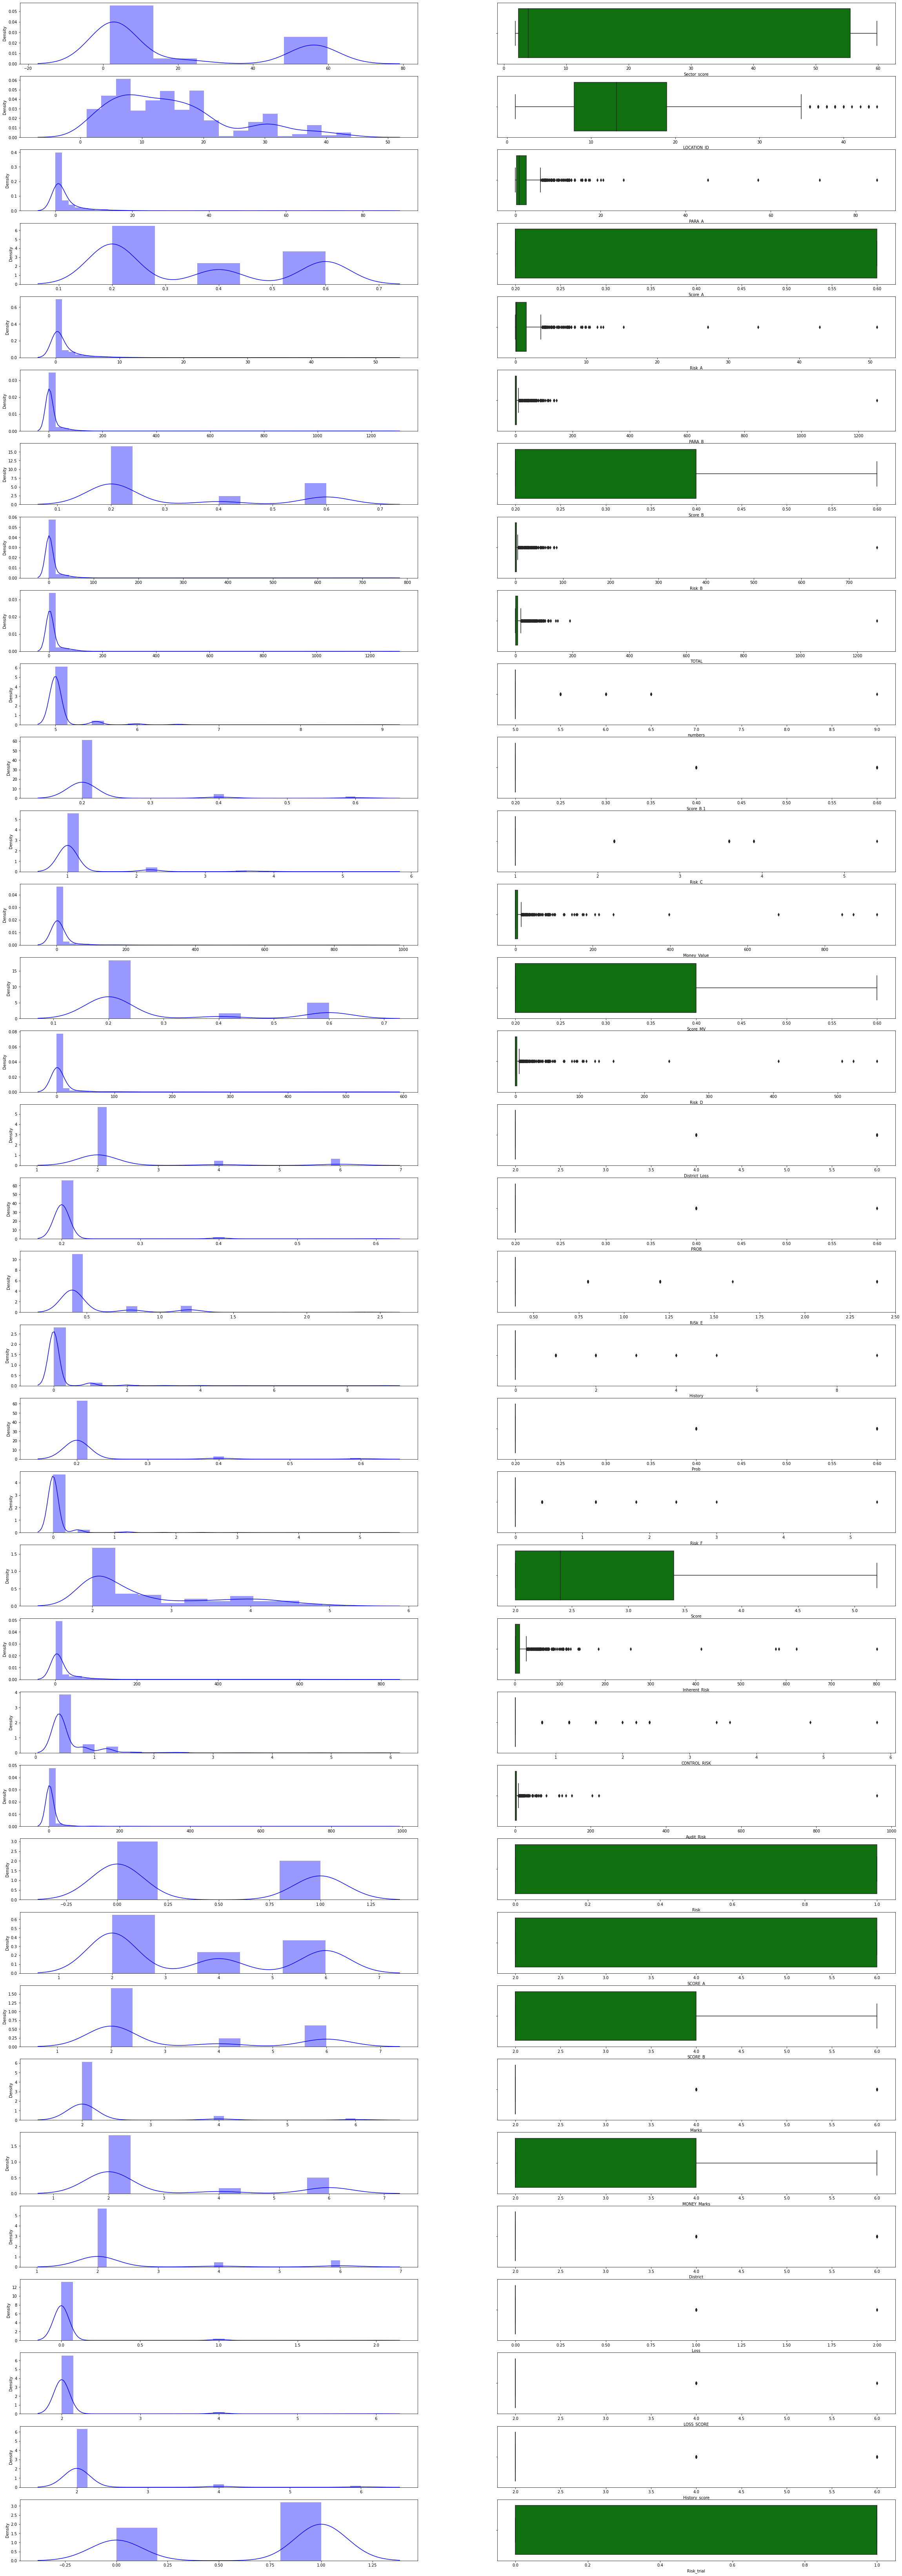

In [26]:
features = list(df.columns)
fig, axs = plt.subplots(len(features),2,figsize=(40,120))
    
for idx, column in enumerate(features):
    sns.distplot(
        x=df[column], 
        color='blue', 
        ax=axs[idx][0])
    sns.boxplot(
        x=df[column],
        color='green',
        ax=axs[idx][1]
        )

So from the plot generated above, there was 2 information that can be extracted:

All features have non gaussian features
There are outlier in many feature on the dataset
Because it is difficult to identify the outlier, below is attached a function to identify the number of outliers from each feature

In [27]:
from numpy import mean
from numpy import std

cols_with_outliers = []

for i in df:
    data_mean, data_std = mean(df[i]), std(df[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in df[i] if x < lower or x > upper]
    print("Outlier in", i + ' %d' % len(outliers))

Outlier in Sector_score 0
Outlier in LOCATION_ID 0
Outlier in PARA_A 7
Outlier in Score_A 0
Outlier in Risk_A 7
Outlier in PARA_B 1
Outlier in Score_B 0
Outlier in Risk_B 1
Outlier in TOTAL 2
Outlier in numbers 22
Outlier in Score_B.1 22
Outlier in Risk_C 22
Outlier in Money_Value 6
Outlier in Score_MV 0
Outlier in Risk_D 6
Outlier in District_Loss 0
Outlier in PROB 22
Outlier in RiSk_E 6
Outlier in History 15
Outlier in Prob 15
Outlier in Risk_F 15
Outlier in Score 0
Outlier in Inherent_Risk 7
Outlier in CONTROL_RISK 15
Outlier in Audit_Risk 6
Outlier in Risk 0
Outlier in SCORE_A 0
Outlier in SCORE_B 0
Outlier in Marks 22
Outlier in MONEY_Marks 0
Outlier in District 0
Outlier in Loss 21
Outlier in LOSS_SCORE 22
Outlier in History_score 15
Outlier in Risk_trial 0


### Countplot to count the target variable

<AxesSubplot:xlabel='Risk', ylabel='count'>

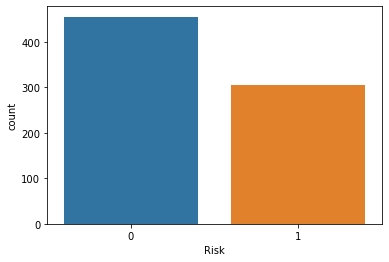

In [28]:
sns.countplot(df['Risk'], label = "Count") 

## Bivariate Analysis
In this step we will explore insight about relationship between features. Few of the relation we will find out are:
1. `Sector_Score` feature and `Risk` feature
2. `History` feature and `Risk` feature
3. `Location_ID` feature and `Money_Value` feature
4. `Loss` feature and `Risk` feature
5. `Para_A`, `Para_B`, and `Risk` feature
6. `TOTAL` feature and `Money_Value` feature
7. `TOTAL`, `Money_Value`, and `Risk` feature

### `Location_ID` feature and `Money_Value` feature

In [29]:
def cluster_location(x):
  if x >= 1 and x<=11:
    return '1-11'
  elif x>11 and x<=21:
    return '12-21'
  elif x>21 and x<=31:
    return '22-31'
  elif x>31 and x<=41:
    return '32-41'
  elif x>41:
    return '>41'
df1 = df.copy()
df1['LOCATION_ID']=df1['LOCATION_ID'].apply(lambda x:cluster_location(x))
df1

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
0,3.89,22-31,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1,6,2,2,2,2,0,2,2,1
1,3.89,1-11,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0,2,2,2,2,2,0,2,2,0
2,3.89,1-11,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0,2,2,2,2,2,0,2,2,0
3,3.89,1-11,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,1,2,6,6,6,2,0,2,2,1
4,3.89,1-11,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0,2,2,2,2,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,55.57,12-21,0.75,0.2,0.150,0.45,0.2,0.090,1.20,5.0,...,0,2,2,2,2,2,0,2,2,0
759,55.57,12-21,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0,2,2,2,2,2,0,2,2,0
760,55.57,12-21,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0,2,2,2,2,2,0,2,2,0
761,55.57,12-21,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0,2,2,2,2,2,0,2,2,0


In [30]:
df2 = df1.groupby(['LOCATION_ID']).agg(
   count = ('LOCATION_ID','count'),
   money_value_sum = ('Money_Value','sum'),
   para_sum = ('TOTAL','sum') 
).reset_index()
df2

,LOCATION_ID,count,money_value_sum,para_sum
0,1-11,321,6031.874,4578.7551
1,12-21,281,3029.410,3006.9427
2,22-31,84,986.570,1308.8509
3,32-41,64,889.180,1303.9823
4,>41,9,18.490,56.5606


<AxesSubplot:label='ec0e02b2-7e5d-4bb2-bae1-852773a70d12', xlabel='LOCATION_ID', ylabel='count'>

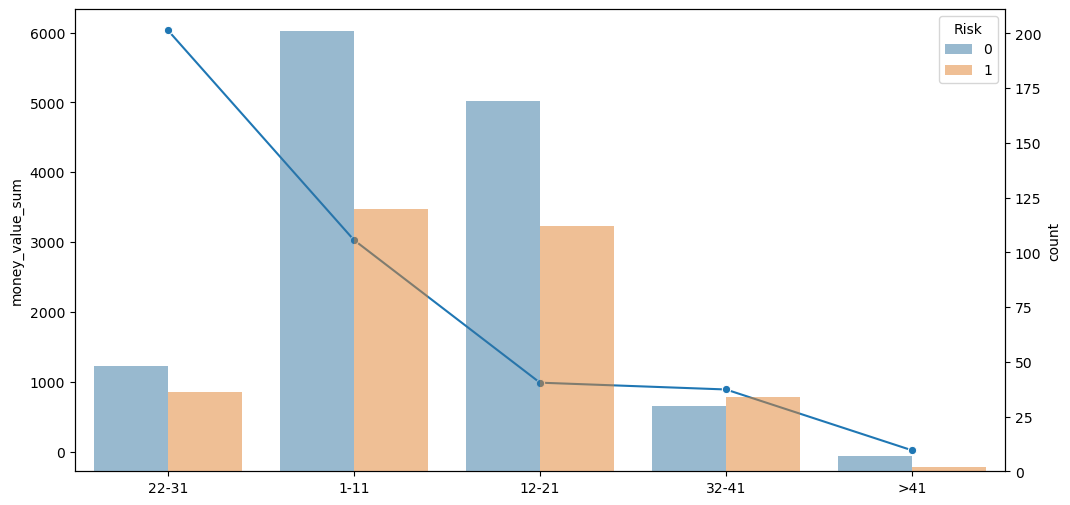

In [31]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df2['money_value_sum'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.countplot(x='LOCATION_ID',data=df1,hue="Risk", alpha=0.5, ax=ax2)

### `Location_ID` feature and `TOTAL` feature

<AxesSubplot:label='7397762f-0f12-4951-80bf-892f20c36022', xlabel='LOCATION_ID', ylabel='count'>

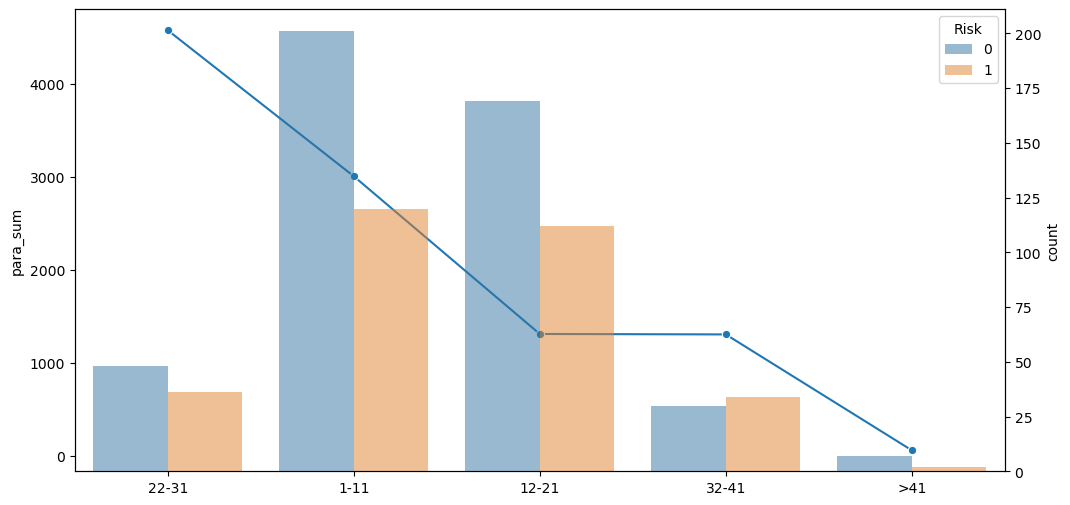

In [32]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df2['para_sum'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.countplot(x='LOCATION_ID',data=df1,hue="Risk", alpha=0.5, ax=ax2)

### `Sector_Score` feature and `Risk` feature

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1.85'),
  Text(1, 0, '1.99'),
  Text(2, 0, '2.34'),
  Text(3, 0, '2.36'),
  Text(4, 0, '2.37'),
  Text(5, 0, '2.72'),
  Text(6, 0, '3.41'),
  Text(7, 0, '3.89'),
  Text(8, 0, '15.56'),
  Text(9, 0, '17.68'),
  Text(10, 0, '21.61'),
  Text(11, 0, '55.57'),
  Text(12, 0, '59.85')])

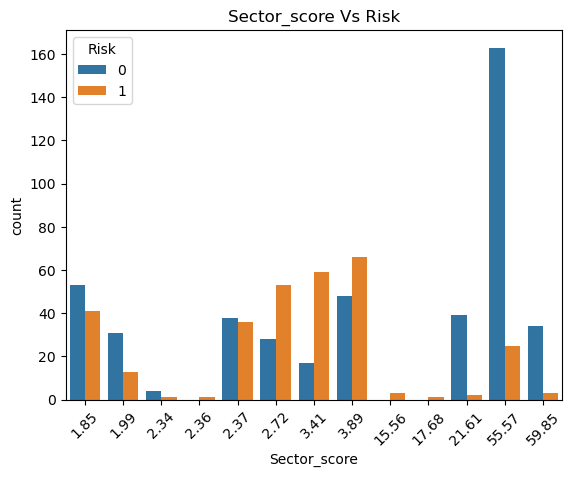

In [33]:
sns.countplot(x='Sector_score',data=df[['Sector_score','Risk']],hue="Risk").set_title("Sector_score Vs Risk")
plt.xticks(rotation=45)

### `History` feature and `Risk` feature

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '9')])

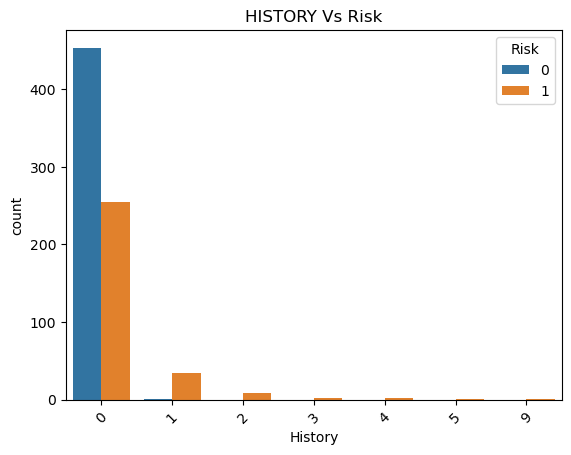

In [34]:
sns.countplot(x='History',data=df[['History','Risk']],hue="Risk").set_title("HISTORY Vs Risk")
plt.xticks(rotation=45)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

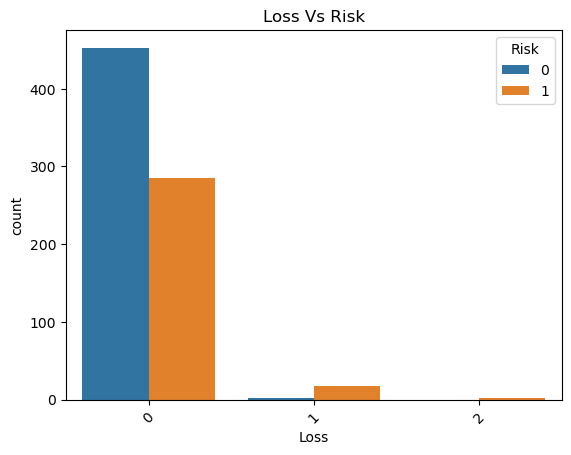

In [35]:
sns.countplot(x='Loss',data=df[['Loss','Risk']],hue="Risk").set_title("Loss Vs Risk")
plt.xticks(rotation=45)

In [36]:
df.groupby('Risk').agg(
    avg_para_a = ('PARA_A','mean'),
    avg_para_b = ('PARA_B','mean'),
    sum_mv = ('Money_Value','sum'),
)

,avg_para_a,avg_para_b,sum_mv
Risk,,,
0,0.741275,0.462530,166.834
1,5.138226,26.874803,10788.690


### `PARA_A`, `PARA_B`, and `Risk` feature

<AxesSubplot:xlabel='PARA_A', ylabel='PARA_B'>

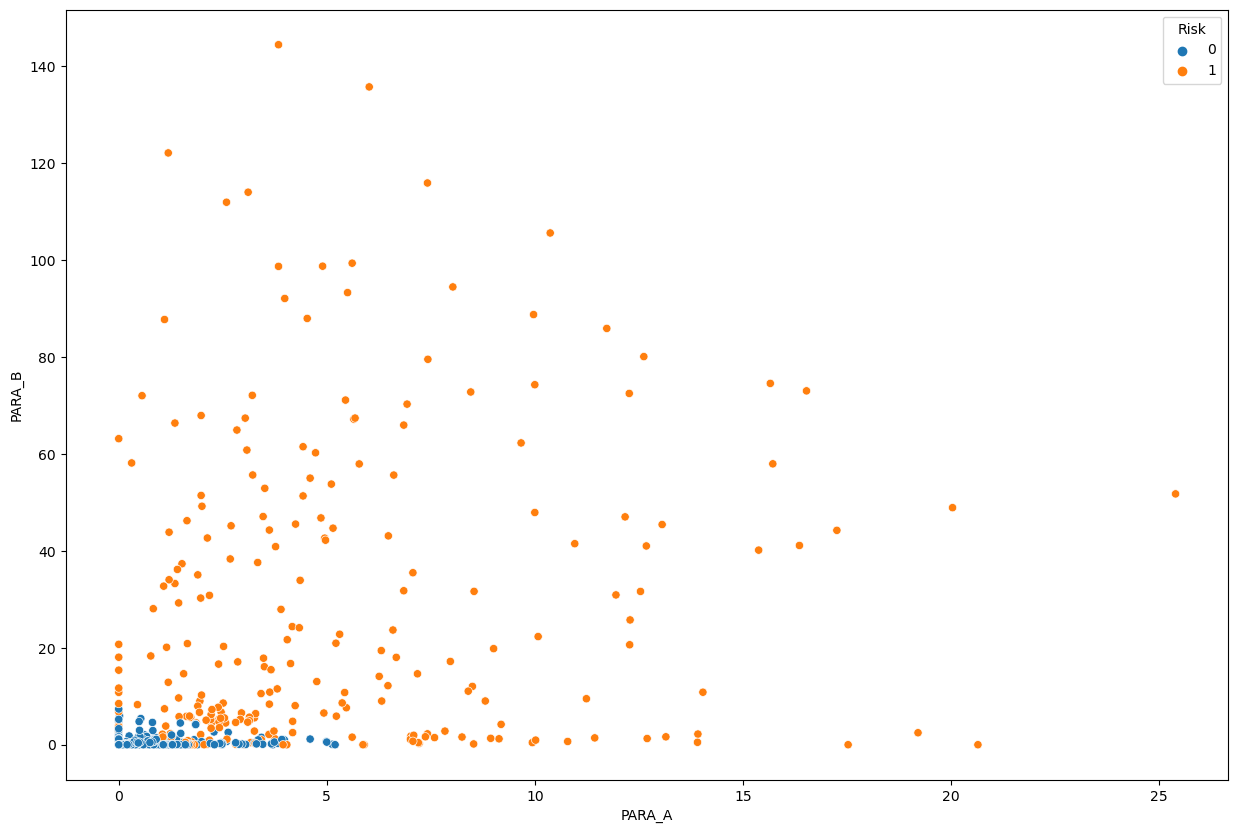

In [37]:
time1 = df[(df['PARA_A']<40)&(df['PARA_B']<200)]
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=time1, x='PARA_A', y='PARA_B', 
                hue='Risk')

### `Money_Value`, `TOTAL`, and `Risk` feature

<AxesSubplot:xlabel='Money_Value', ylabel='TOTAL'>

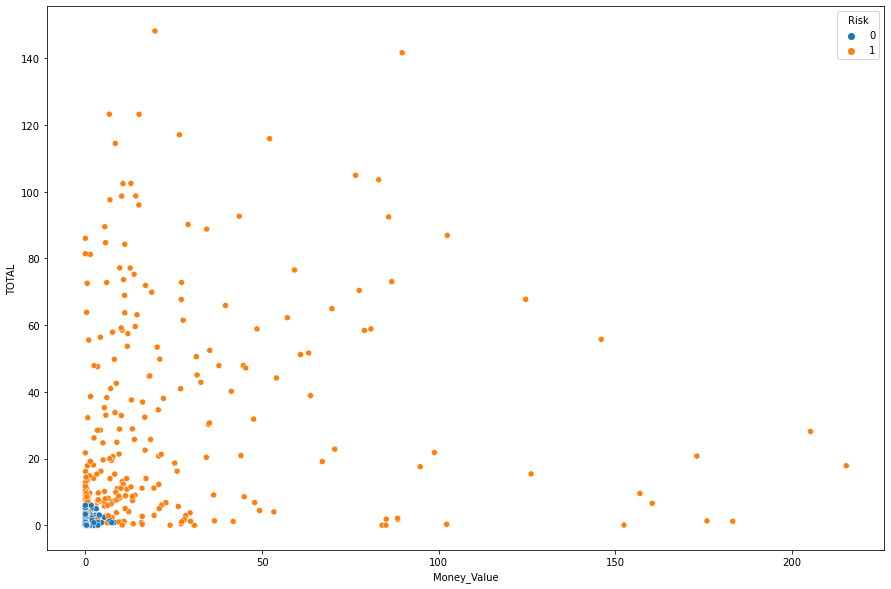

In [112]:
time2 = df[(df['Money_Value']<250)&(df['TOTAL']<200)]
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=time2, x='Money_Value', y='TOTAL', 
                hue='Risk')

Based on the bivariate and multivariate visualization, we found few information that will be listed below:
* Majority of the institution score low Historical risk score value for each target sector. 
* Majority of the institution score low on Loss feature, it indicate that majority of the institution doesn't suffer a lot last year
* Institution that being label for caught doing high risk unfair practices had a much higher average amount of discrepancy found in the planned-expenditure of inspection and summary report A in Rs (in crore), amount of discrepancy found in the unplanned-expenditure of inspection and summary report B in Rs (in crore), and the amount of money involved in misstatements in the past audits than the institution that being label for doing fair practice
* There was unequal amount of that institution that being labeled for doing unfair practice compare to the institution that being label for doing fair practice
* Majority of the institution tend to have high amount of money involve in misstatements with low amount of total discrepancy and vice versa. There were none institution that score high in the both categories but there were many institution that score low in the both categories especially for the institution that label for doing fair practice 

# Data Understanding
In this section we will try to breakdown the feature in the data based on the information we got about the data after we merge it. The goal is to understand the data even futher and try to handle or eliminate feature that was redundant based on the information given in the description (not from the pearson correlation)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 762
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   759 non-null    float64
 1   LOCATION_ID    759 non-null    float64
 2   PARA_A         759 non-null    float64
 3   Score_A        759 non-null    float64
 4   Risk_A         759 non-null    float64
 5   PARA_B         759 non-null    float64
 6   Score_B        759 non-null    float64
 7   Risk_B         759 non-null    float64
 8   TOTAL          759 non-null    float64
 9   numbers        759 non-null    float64
 10  Score_B.1      759 non-null    float64
 11  Risk_C         759 non-null    float64
 12  Money_Value    759 non-null    float64
 13  Score_MV       759 non-null    float64
 14  Risk_D         759 non-null    float64
 15  District_Loss  759 non-null    int64  
 16  PROB           759 non-null    float64
 17  RiSk_E         759 non-null    float64
 18  History   

In [39]:
df.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,...,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,19.744163,14.927536,2.502372,0.354677,1.380749,11.041358,0.315679,6.475771,13.511320,5.069170,...,0.400527,3.546772,3.156785,2.242424,2.930171,2.511199,0.030303,2.063241,2.171278,0.638999
std,24.135153,9.934549,5.731276,0.174499,3.473000,50.615833,0.170841,30.393096,51.847247,0.267201,...,0.490328,1.744985,1.708408,0.811684,1.609380,1.233682,0.186281,0.379147,0.686982,0.480608
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.260000,0.200000,0.052000,0.000000,0.200000,0.000000,0.600000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.920000,0.200000,0.184000,0.460000,0.200000,0.092000,1.430000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,19.000000,2.530000,0.600000,1.518000,4.485000,0.400000,2.115000,8.085000,5.000000,...,1.000000,6.000000,4.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


From the statistics alone, we found that:
* All the feature are storing numeric data object such as float and integer
* Feature in data had different range of standard deviation, that indicate that the there was a difference in the data dispersion for each feature.
* Feature in the data had different maximum and minimum value, that indicate there the feature need scaling before we start to build machine learning
* There are many feature that store rating data, for example SCORE_A store PARA_A score assessment

From the description about the data, we found that:
* Many feature are derived from another feature, such as SCORE_A and Risk_A are derived from PARA_A. My solution for these kind of feature is to just to select the one of the more important feature and drop the rest
* Many feature store same value but with different feature name, this was cause by merging 2 different data set. For example PROB(probability of district loss score) in Audit_Risk multiplied by 10 is the Loss_Score in trial. My solution for these kind of feature is to just select one of the feature and drop the rest

In [40]:
df = df.drop(['Audit_Risk','Risk_trial','SCORE_A','SCORE_B','Score_A','Score_B','Score_B.1','Score_MV','RiSk_E','Risk_F','Marks','MONEY_Marks','LOSS_SCORE','History_score'], axis = 1)

Explanation why those feature drop:
* SCORE_A, Score_A, RISK_A derived from PARA_A
* SCORE_B, Score_B, RISK_B derived from PARA_B
* Score_B.1, Risk_C derived from numbers
* SCORE_MV, Risk_D derived from Money_Value
* Risk_E derived from District_Loss and PROB
* Risk_F derived from History and Prob
* Audit_Risk derived from Inherent_Risk, CONTROL_RISK, and Detection_Risk
* Marks contain same value as Score_B.1 but multiply by 10
* Money_Marks contain same value as Score_MV but multiply by 10
* Loss_Score contain same value as PROB but multiply by 10
* History_Score contain same value as prob but multiply by 10
* Risk_Trial derived from Score (We only use Risk as a target variable)


In [41]:
column = list(df.columns)
for i in column:
    print(i, " has ", df[i].nunique(), " unique value")

Sector_score  has  13  unique value
LOCATION_ID  has  42  unique value
PARA_A  has  361  unique value
Risk_A  has  361  unique value
PARA_B  has  358  unique value
Risk_B  has  360  unique value
TOTAL  has  470  unique value
numbers  has  5  unique value
Risk_C  has  5  unique value
Money_Value  has  327  unique value
Risk_D  has  327  unique value
District_Loss  has  3  unique value
PROB  has  3  unique value
History  has  7  unique value
Prob  has  3  unique value
Score  has  17  unique value
Inherent_Risk  has  583  unique value
CONTROL_RISK  has  11  unique value
Risk  has  2  unique value
District  has  3  unique value
Loss  has  3  unique value


By looking at total unique value in each column/feature, we found that many column contain small amount of unique value compare to others. After looking throught to the description, it was found that many column/feature store scoring value base on another column.

# Feature Selection and Engineering
This stage is carried out to prepare the data that will be used in modeling. Feature selection and engineering will be split into few section below:
* Feature Selection
* Dropping Irrelevant Data
* Outlier Handling

## Feature Selection
In this section we will be doing feature selection using `pearson correlation`. The `pearson correlation` will be plotted using heatmap. 
<br><br>
**Note 1**:
<br>
Referencing from research page, it was mention that they use Particle Swarm Optimization (PSO) for feature extraction. According to the result of PSO, it was found that there are 8 feature that fraud depend on, the feature was PARA_A, PARA_B, numbers, Money_Value, Sector_score, History, District, Loss.
<br><br>
So futher on we will check if the research was true by checking it using pearson correlation
<br><br>
(PSO method works by minimizing the total root of square differences between Audit risk and total of product of features and their respective weights)
<br><br>
**Note 2**:
<br>
High positive correlation identified by correlation value >= 0,75

<AxesSubplot:>

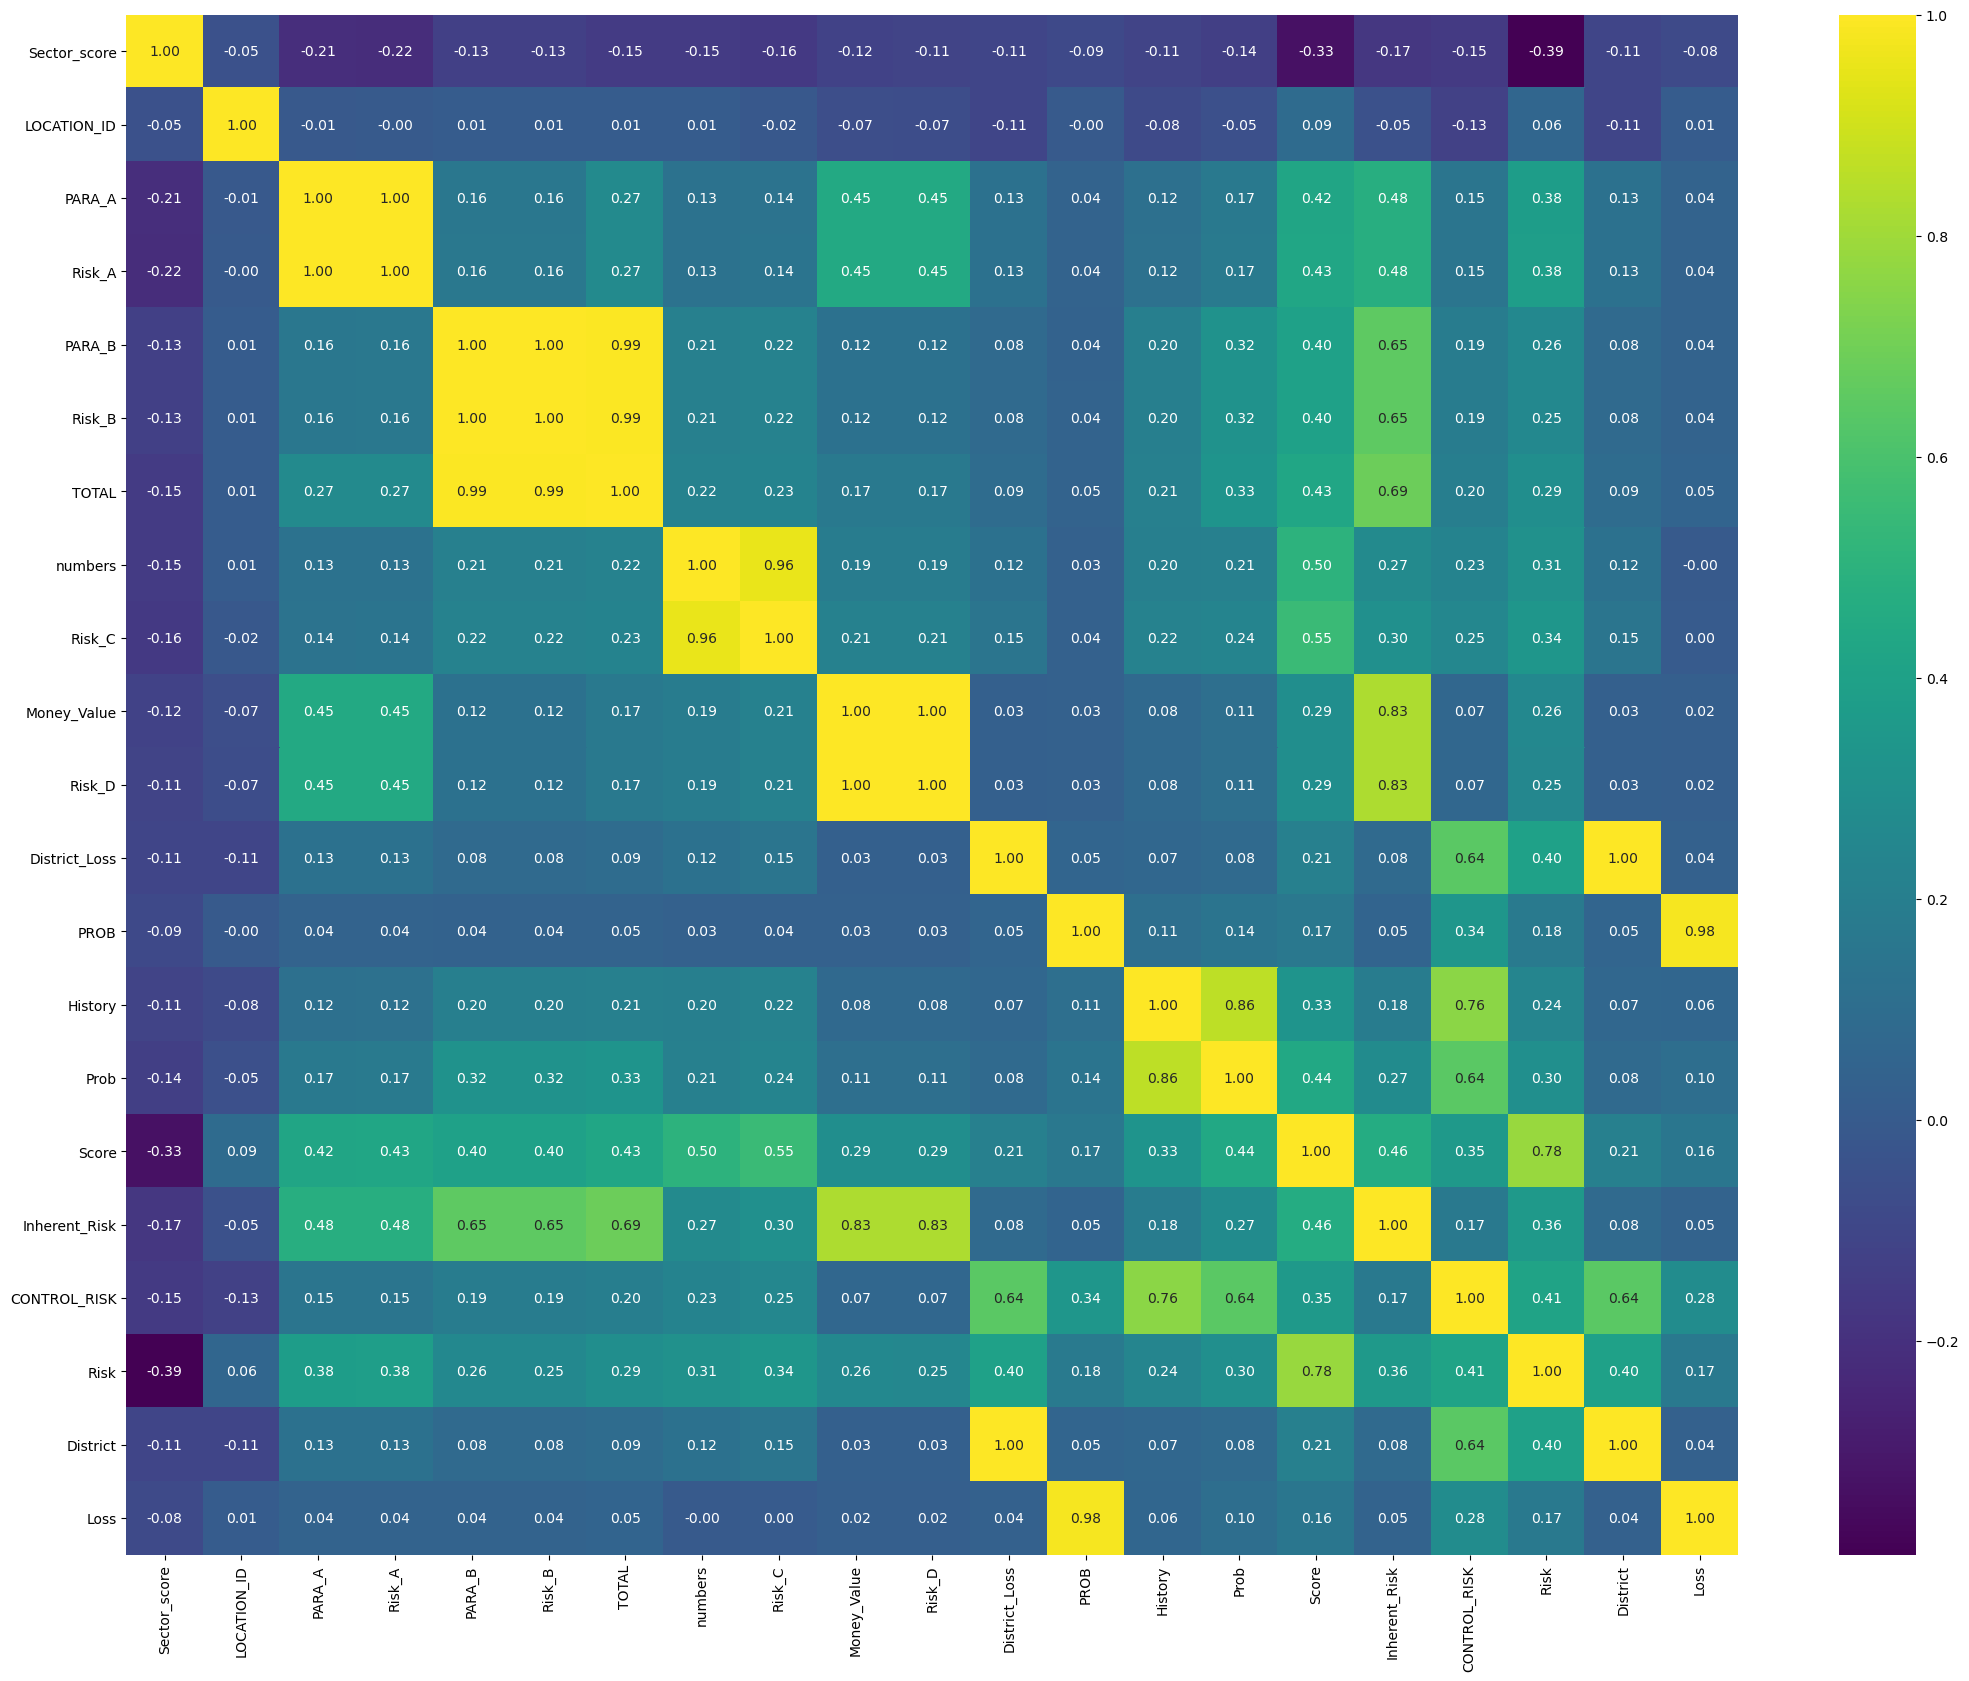

In [42]:
corr_= df.corr()
plt.figure(figsize=(26,20))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "viridis")

After i check the correlation between feature using pearson correlation (heatmap), i found there are feature that correlated with each other, i will give the list below for better reading:
* `PARA_A` has high positive correlation with `Risk_A`
* `PARA_B` has high positive correlation with `Risk_B` and `TOTAL`
* `numbers` has high positive correlation with `Risk_C`
* `Money_Value` has high positive correlation with `Risk_D` and `Inherent_Risk`
* `District` has high positive correlation with `District_Loss`
* `Loss` has high positive correlation with `PROB`
* `History` has high positive correlation with `prob` and `CONTROL_RISK`
* `Risk` has high positive correlation with `Score`
<br>
<br>

High positive correlation identified by correlation value >= 0,75
<br><br>
To avoid/reduce multicollinearity of the data, it was decided to drop the high correlated feature and only retain one of the each feature that correlate 


In [43]:
df = df.drop(['Score','Risk_A','Risk_B','TOTAL','Risk_C','Risk_D','Inherent_Risk','District_Loss','PROB','Prob','CONTROL_RISK'], axis = 1)

<AxesSubplot:>

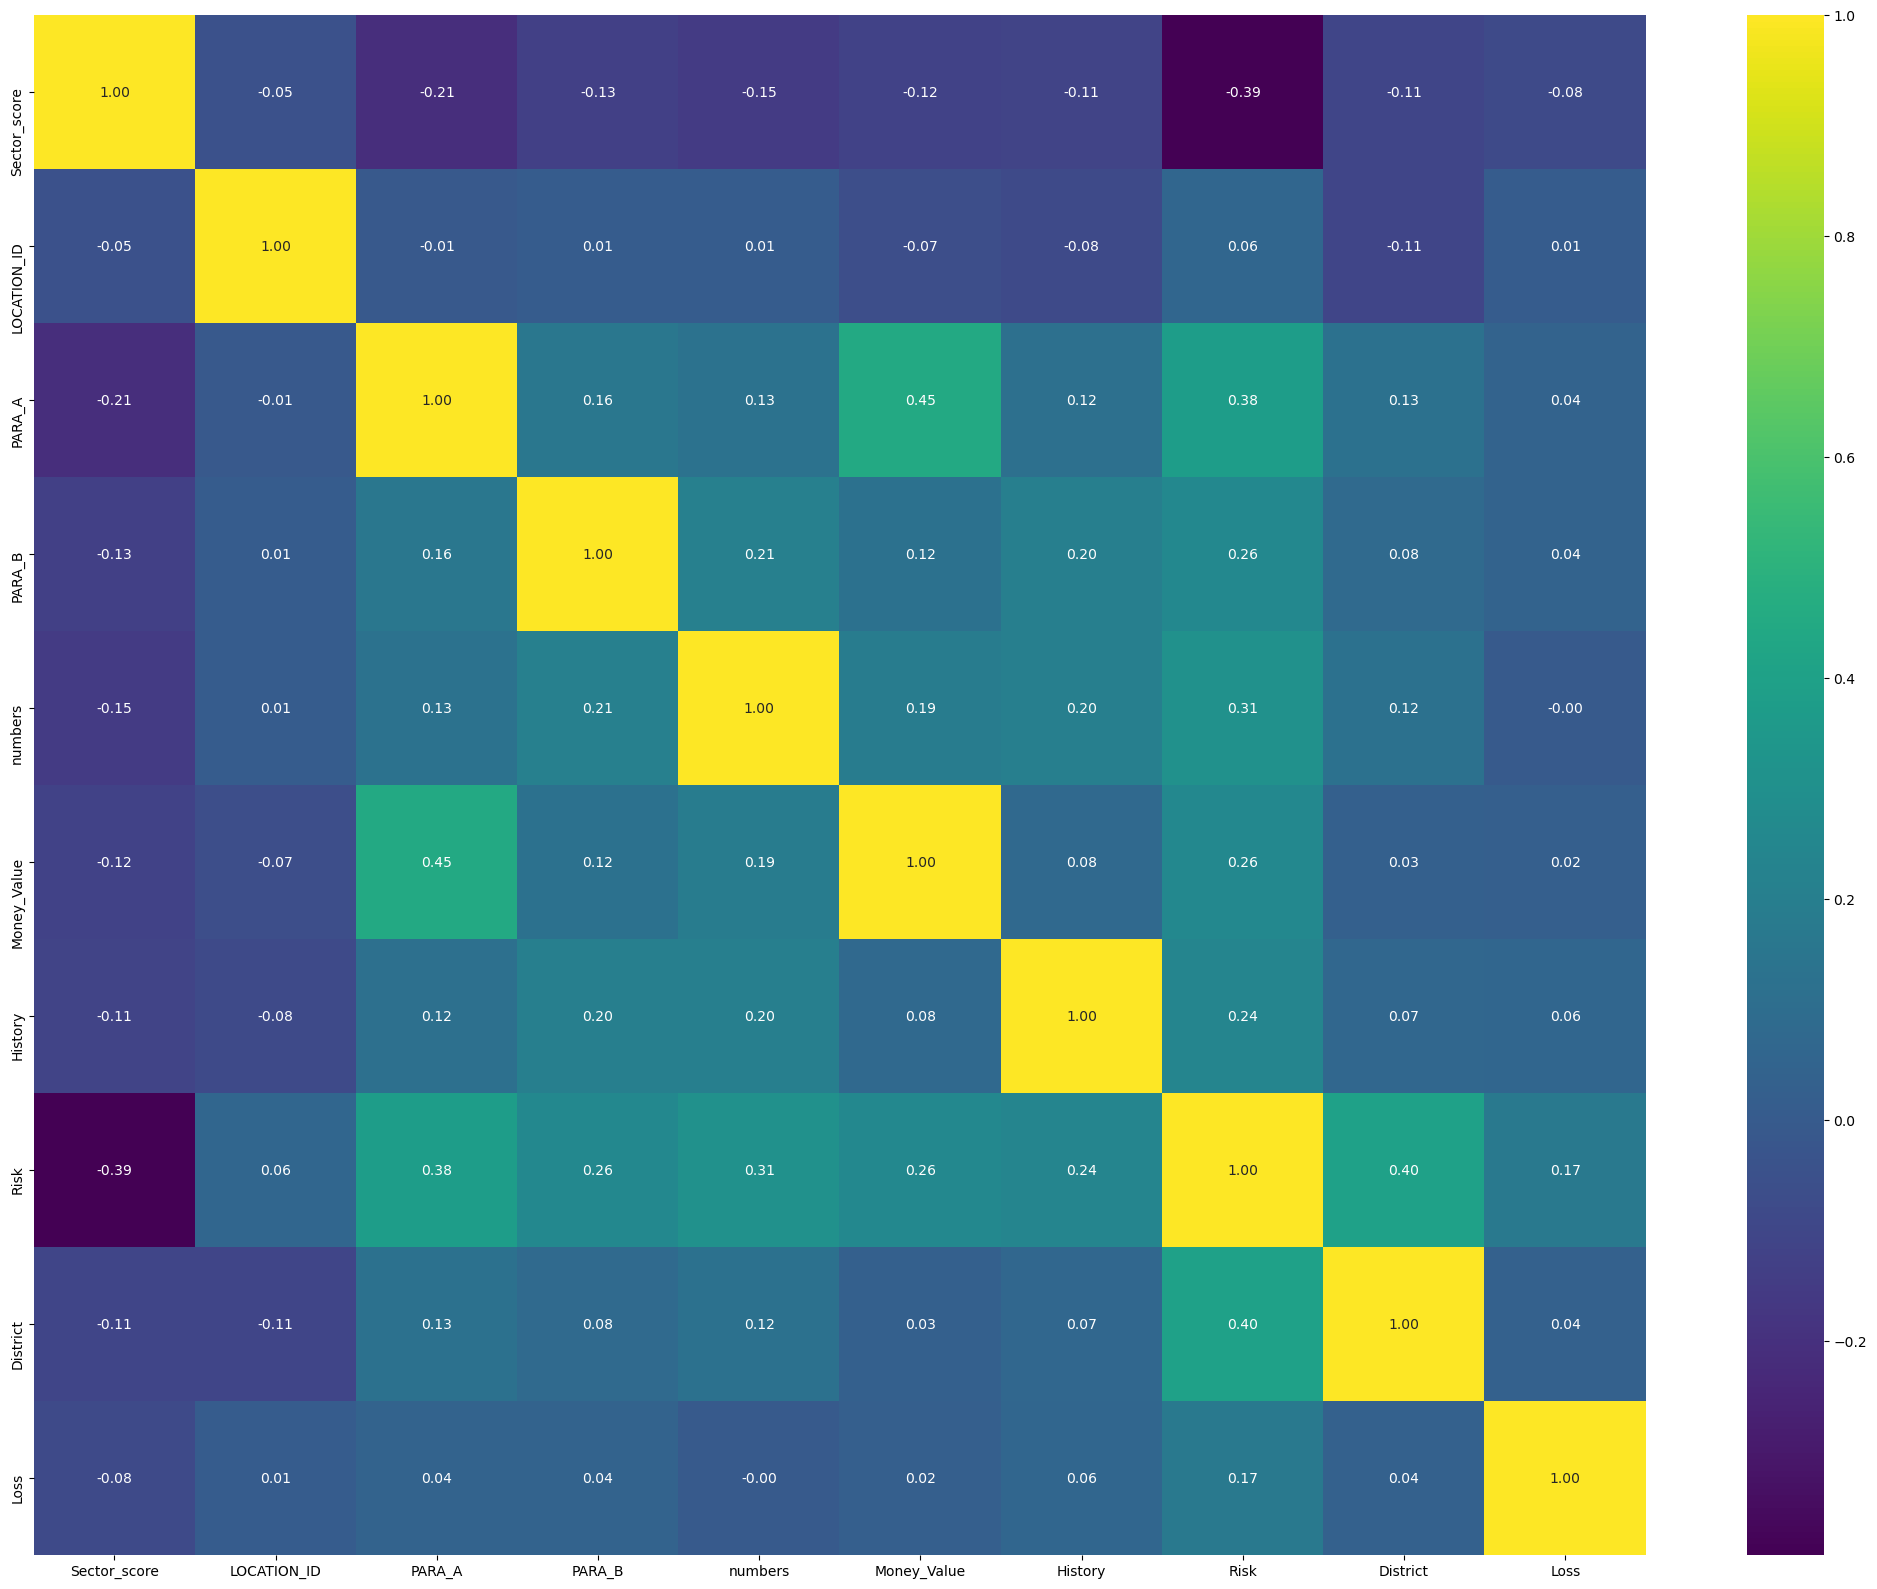

In [44]:
corr_= df.corr()
plt.figure(figsize=(26,20))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "viridis")

In [45]:
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'numbers',
       'Money_Value', 'History', 'Risk', 'District', 'Loss'],
      dtype='object')

In [46]:
column = list(df.columns)
for col in column:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Sector_score column
55.57    188
3.89     114
1.85      94
2.72      81
3.41      76
2.37      74
1.99      44
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64 

Value counts of LOCATION_ID column
8.0     74
19.0    68
16.0    51
9.0     51
12.0    44
5.0     43
2.0     40
4.0     36
13.0    35
15.0    33
6.0     33
32.0    29
11.0    26
22.0    24
29.0    21
14.0    20
18.0    16
31.0    12
1.0     11
37.0    10
39.0     9
21.0     8
28.0     8
43.0     7
27.0     7
25.0     6
20.0     5
38.0     4
36.0     4
30.0     4
7.0      4
40.0     3
3.0      3
35.0     2
23.0     1
17.0     1
33.0     1
34.0     1
42.0     1
41.0     1
44.0     1
24.0     1
Name: LOCATION_ID, dtype: int64 

Value counts of PARA_A column
0.00    139
0.51      8
0.84      7
0.49      7
0.56      7
       ... 
1.24      1
1.94      1
1.82      1
4.01      1
1.15      1
Name: PARA_A, Length: 361, dtype: int64 

Value counts of PARA_B co

After we successfuly drop the high correlated feature, we can proceed to plot the data to analyse the data even futher using pairplot

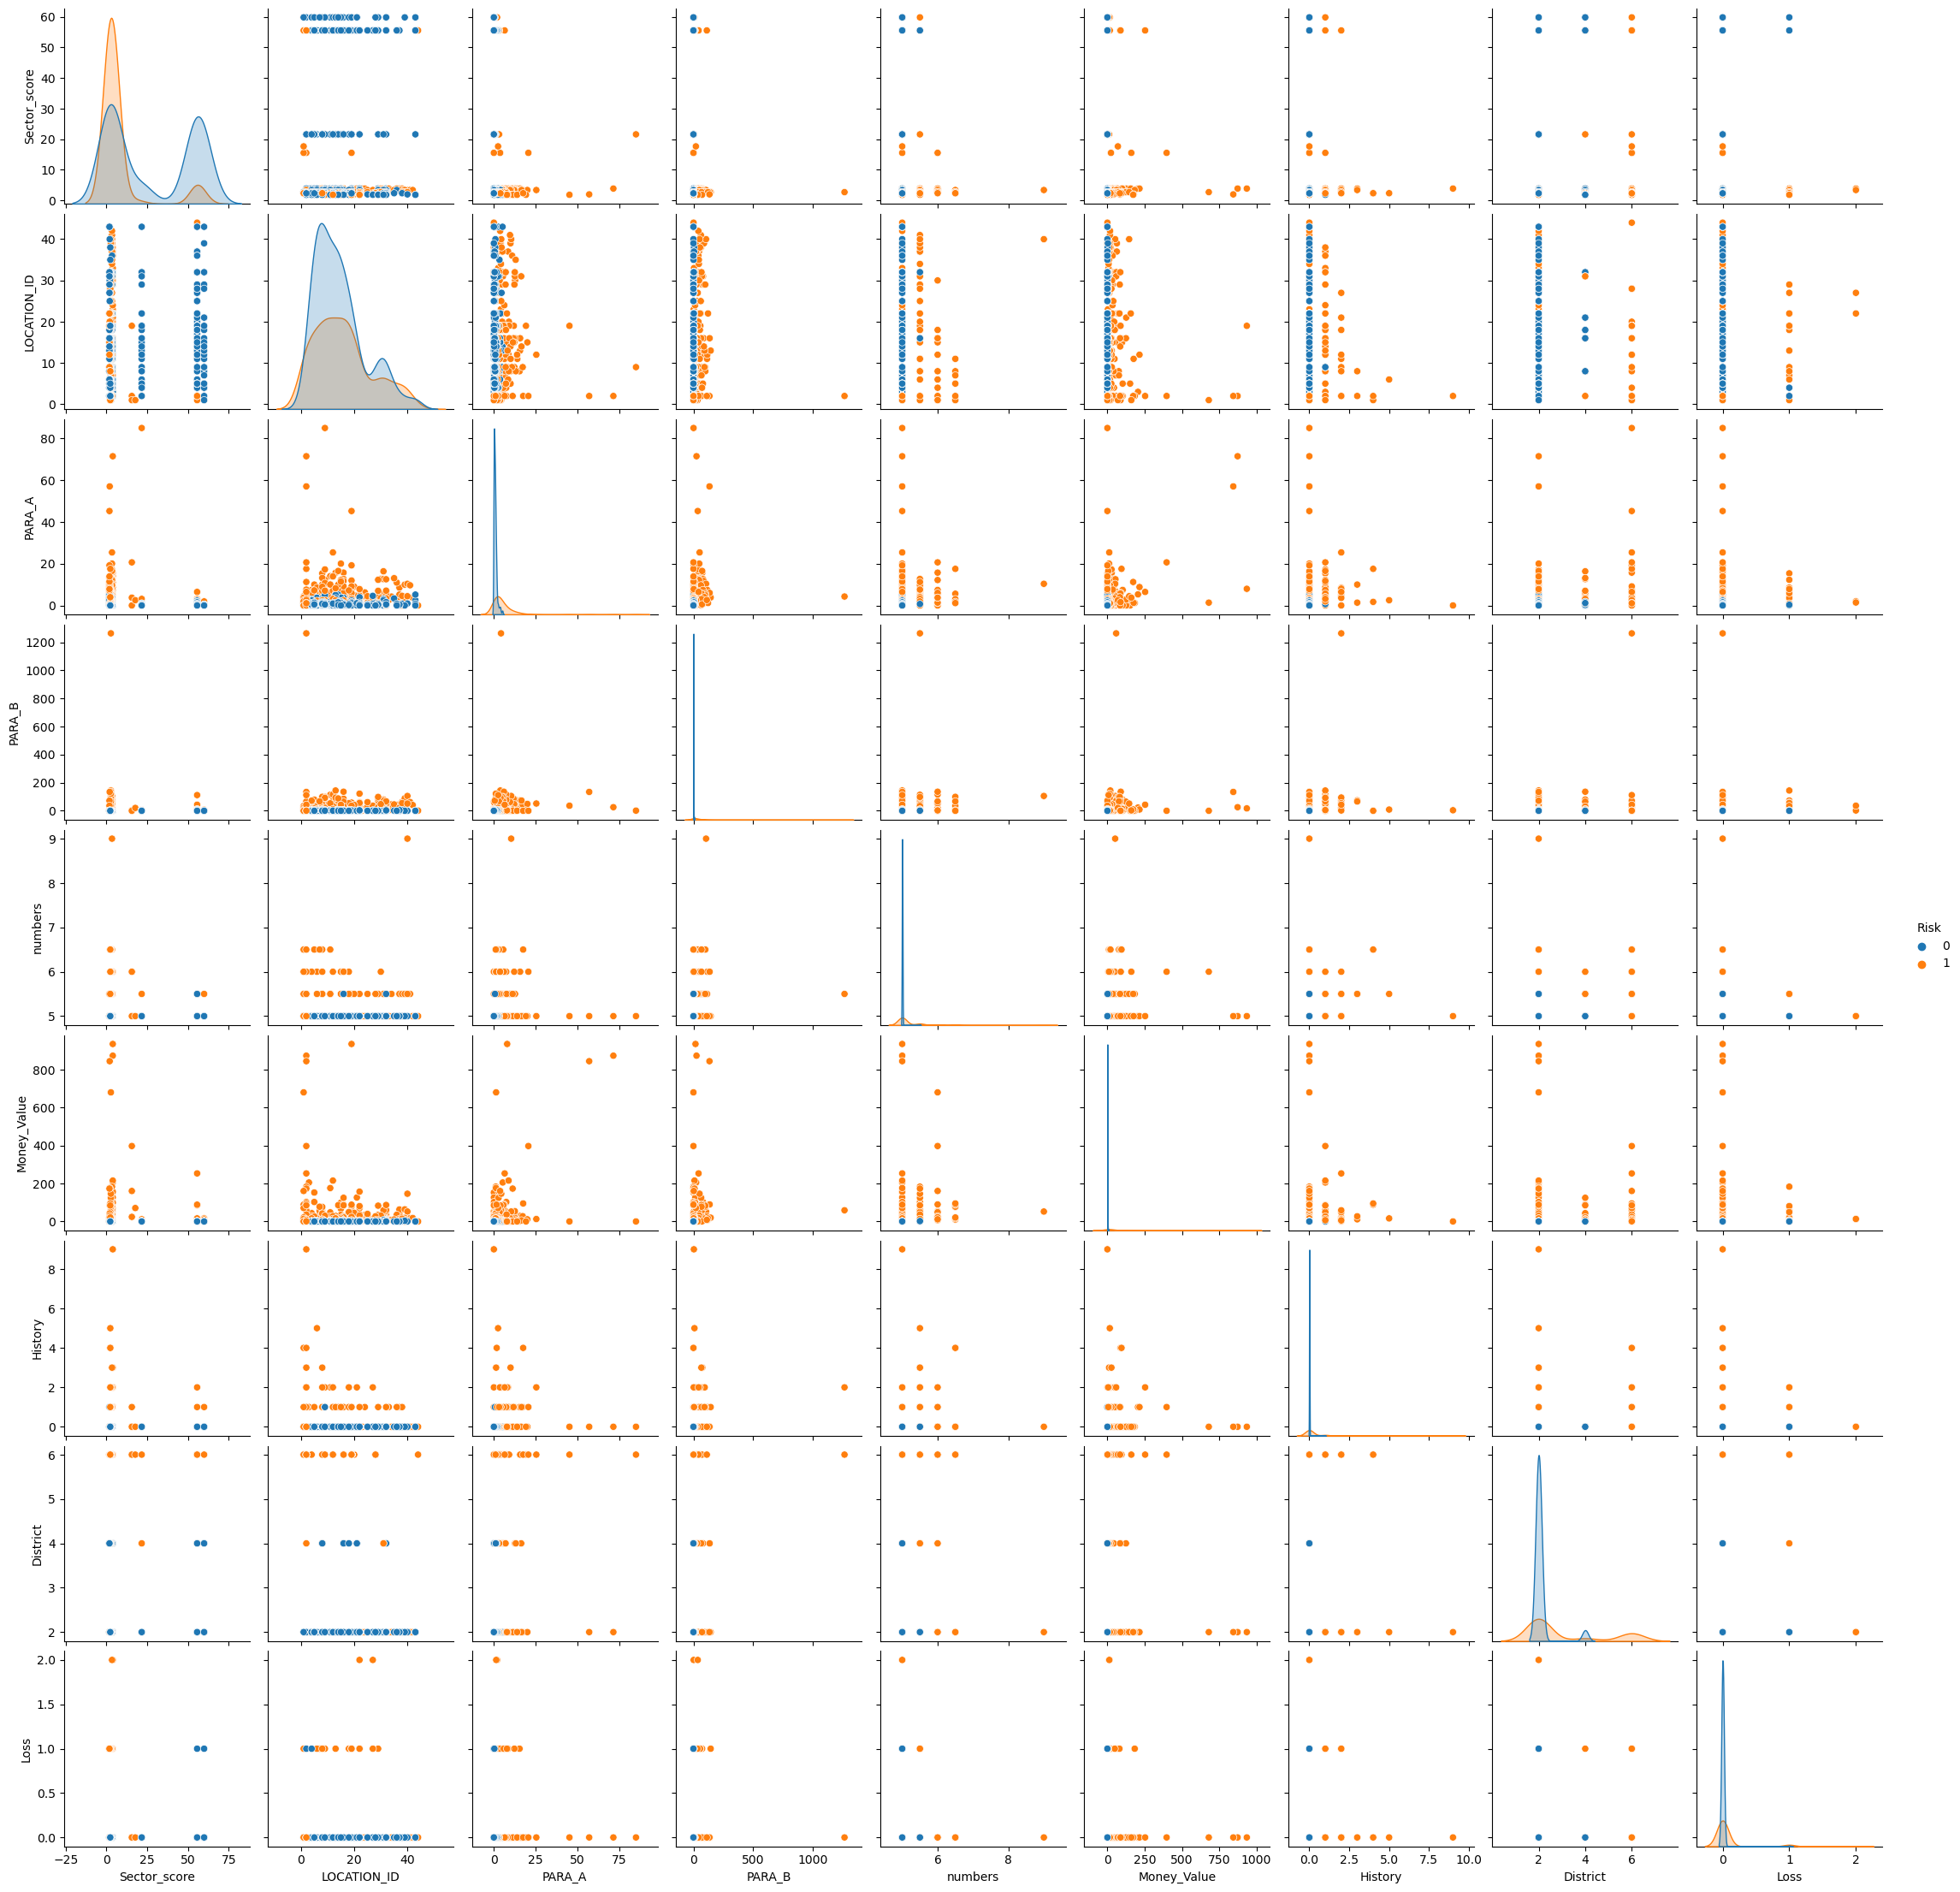

In [47]:
sns.pairplot(df,hue='Risk')

In [48]:
df.describe()

,Sector_score,LOCATION_ID,PARA_A,PARA_B,numbers,Money_Value,History,Risk,District,Loss
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,19.744163,14.927536,2.502372,11.041358,5.069170,14.434155,0.106719,0.400527,2.511199,0.030303
std,24.135153,9.934549,5.731276,50.615833,0.267201,67.274126,0.536720,0.490328,1.233682,0.186281
min,1.850000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.370000,8.000000,0.260000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,3.890000,13.000000,0.920000,0.460000,5.000000,0.110000,0.000000,0.000000,2.000000,0.000000
75%,55.570000,19.000000,2.530000,4.485000,5.000000,6.040000,0.000000,1.000000,2.000000,0.000000
max,59.850000,44.000000,85.000000,1264.630000,9.000000,935.030000,9.000000,1.000000,6.000000,2.000000


## Outlier Handling
In the step beforehand, we successfuly deleted all the variable that had high positive correlation value. But we haven't handle the feature that had outlier data. The simple way to handle outlier data is to drop them, but we can't just drop them (because it may contain important data and we can only remove outlier if the data nonsensical)
<br><br>
I opted to use log transformation for handling the outlier data because this method able to transform skewed data to normal distribution data (approach it at minimum).
<br><br>
I will start by storing feature that had outlier data and continue the proses by transforming data in those feature using log transformation

In [49]:
cols_with_outliers = []
for i in df:
    data_mean, data_std = mean(df[i]), std(df[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in df[i] if x < lower or x > upper]
    if len(outliers)>0:
        cols_with_outliers.append(i)

In [50]:
cols_with_outliers

['PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'History', 'Loss']

In [51]:
for i in cols_with_outliers:
    df[i] = np.log(df[i]+1)

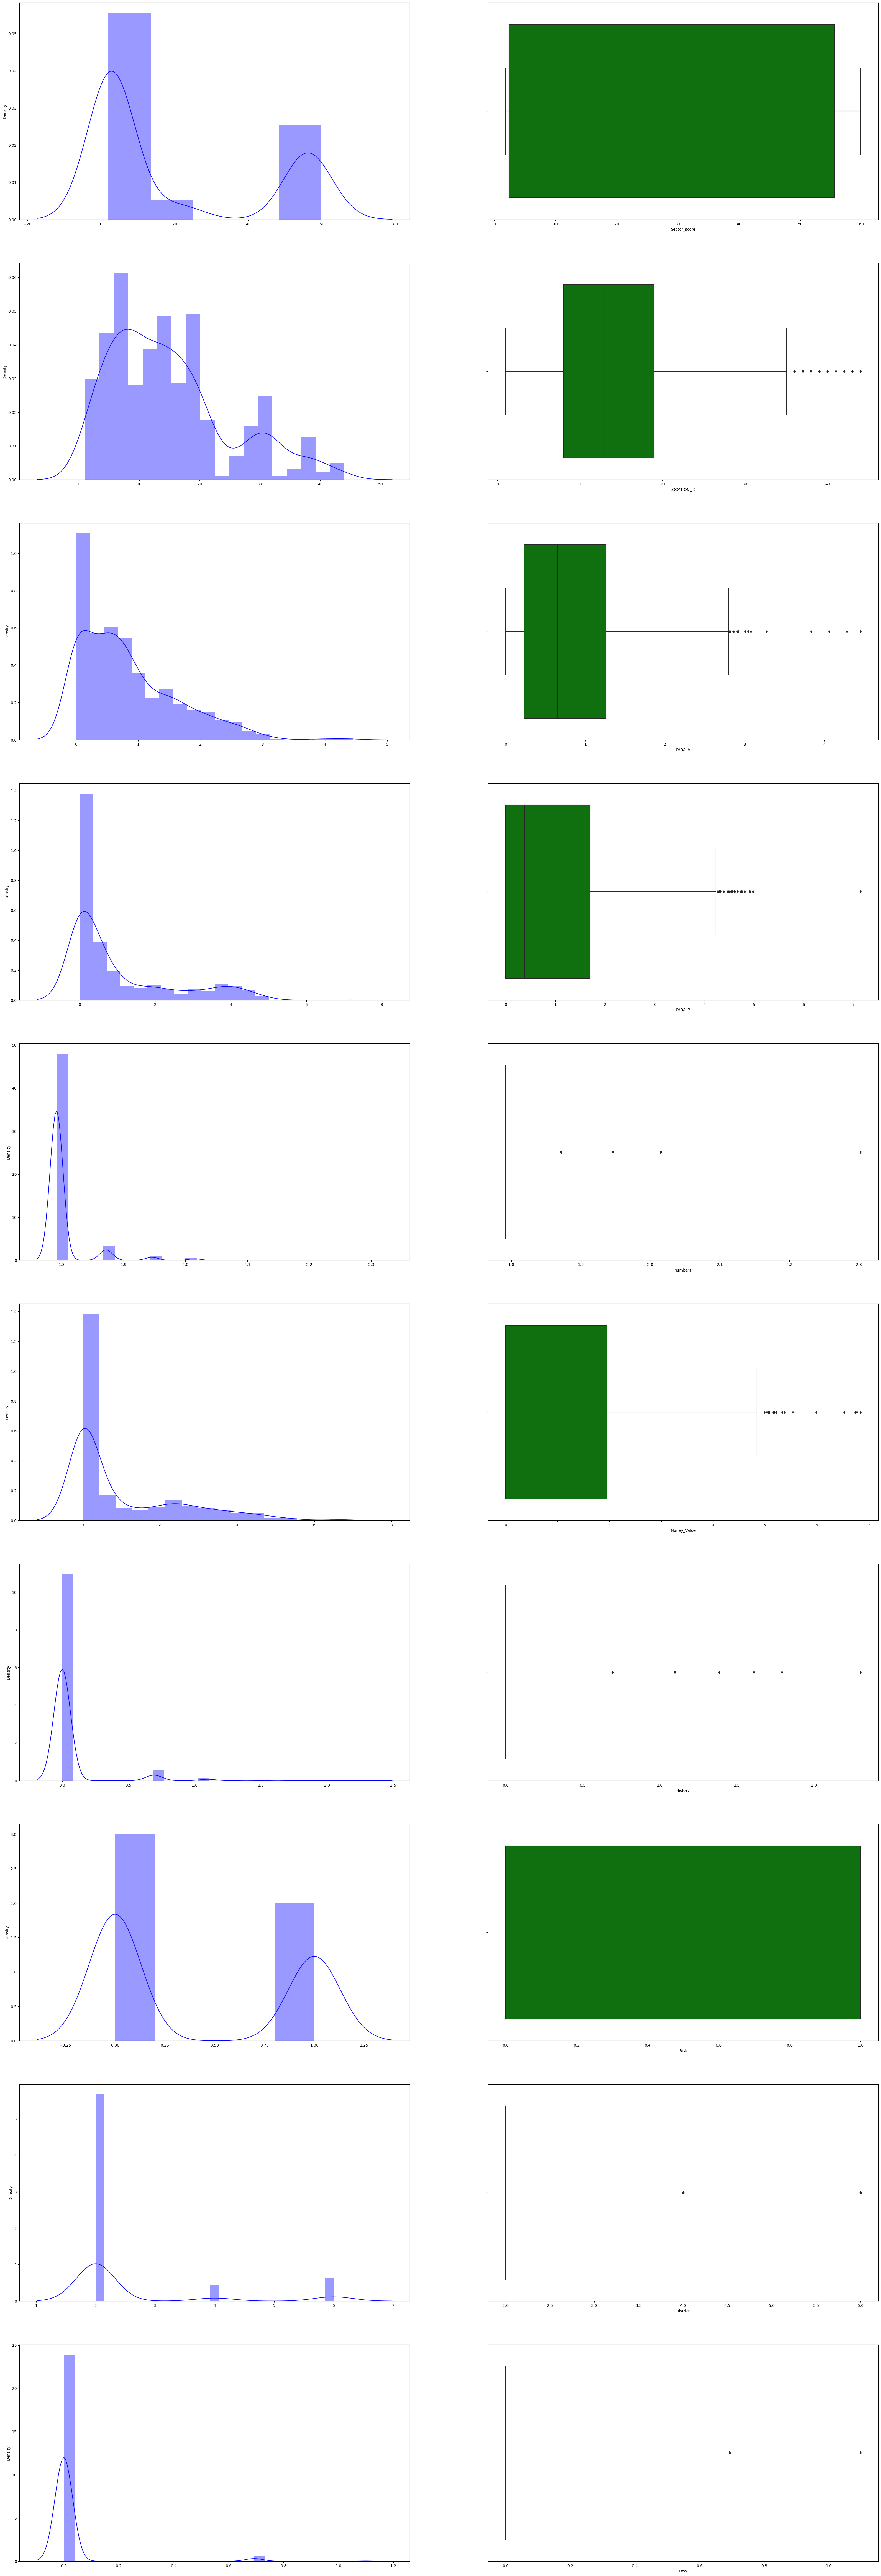

In [52]:
features = list(df.columns)
fig, axs = plt.subplots(len(features),2,figsize=(40,120))
    
for idx, column in enumerate(features):
    sns.distplot(
        x=df[column], 
        color='blue', 
        ax=axs[idx][0])
    sns.boxplot(
        x=df[column],
        color='green',
        ax=axs[idx][1]
        )

After we transform the feature with outlier data using log transformation, as you can see the outlier is lesser than before and the data is also approacing normal distribution. We can continue to our next step that is scaling the data

# Machine Learning
In this step we will create a model to predict whereas a firm is fraudulent or not. For getting the best result we will try to compare model that created from different method. But before we done the machine learning process, we need to create a baseline model to check whereas there will be a model improvement if we done deep feature selection and feature engineering.
<br><br>
Note: we need to check if the target variable had imbalance data or not, the goal to determine the right metric

In [53]:
df['Risk'].value_counts()

0    455
1    304
Name: Risk, dtype: int64

Because the data are imbalance, we cannot use accuracy as the right metric. Use recall (sensitivity) instead! The reason is we do not want to risk letting go company with even the slightest possible chance of being fraudulent. We are also be able to use ROC/AUC and F1 Score as the metric.
<br><br>
For the purpuse of comparing model, Below mention model that being used for the modelling:
* KNN Classifier
* Logistic Regression
* Decision Tree
* Naive Bayes
* Support Vector Machine

## Baseline Model

In [54]:
data = data1.merge(data2, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Score','Sector_score','TOTAL','numbers'], sort = False)

In [55]:
data = data.dropna()

In [56]:
filter = data['LOCATION_ID'].isin(['NUH','LOHARU','SAFIDON'])
data = data[~filter]
data['LOCATION_ID'] = data['LOCATION_ID'].astype(float)

In [57]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
0,3.89,23.0,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1,6,2,2,2,2,0,2,2,1
1,3.89,6.0,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0,2,2,2,2,2,0,2,2,0
2,3.89,6.0,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0,2,2,2,2,2,0,2,2,0
3,3.89,6.0,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,1,2,6,6,6,2,0,2,2,1
4,3.89,6.0,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0,2,2,2,2,2,0,2,2,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 762
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    759 non-null    float64
 1   LOCATION_ID     759 non-null    float64
 2   PARA_A          759 non-null    float64
 3   Score_A         759 non-null    float64
 4   Risk_A          759 non-null    float64
 5   PARA_B          759 non-null    float64
 6   Score_B         759 non-null    float64
 7   Risk_B          759 non-null    float64
 8   TOTAL           759 non-null    float64
 9   numbers         759 non-null    float64
 10  Score_B.1       759 non-null    float64
 11  Risk_C          759 non-null    float64
 12  Money_Value     759 non-null    float64
 13  Score_MV        759 non-null    float64
 14  Risk_D          759 non-null    float64
 15  District_Loss   759 non-null    int64  
 16  PROB            759 non-null    float64
 17  RiSk_E          759 non-null    flo

In [59]:
data.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,...,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,19.744163,14.927536,2.502372,0.354677,1.380749,11.041358,0.315679,6.475771,13.511320,5.069170,...,0.400527,3.546772,3.156785,2.242424,2.930171,2.511199,0.030303,2.063241,2.171278,0.638999
std,24.135153,9.934549,5.731276,0.174499,3.473000,50.615833,0.170841,30.393096,51.847247,0.267201,...,0.490328,1.744985,1.708408,0.811684,1.609380,1.233682,0.186281,0.379147,0.686982,0.480608
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.260000,0.200000,0.052000,0.000000,0.200000,0.000000,0.600000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.920000,0.200000,0.184000,0.460000,0.200000,0.092000,1.430000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,19.000000,2.530000,0.600000,1.518000,4.485000,0.400000,2.115000,8.085000,5.000000,...,1.000000,6.000000,4.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [60]:
y = data['Risk']
X = data.drop(['Risk'], axis = 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Kernilzed Support Vector Machine

In [64]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

datree = DecisionTreeClassifier(random_state=0)
datree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
naiba = GaussianNB()
naiba.fit(X_train, y_train)

GaussianNB()

### Evaluation of Baseline Model

In [67]:
y_predknn = knn.predict(X_test)
y_predreg = logreg.predict(X_test)
y_predsvm = svm.predict(X_test)
y_preddt = datree.predict(X_test)
y_prednb = naiba.predict(X_test)

In [68]:
baseline = pd.DataFrame(np.array([[accuracy_score(y_test,y_predknn),accuracy_score(y_test, y_predreg),accuracy_score(y_test, y_predsvm),accuracy_score(y_test, y_preddt),accuracy_score(y_test, y_prednb)],
                       [recall_score(y_test, y_predknn), recall_score(y_test, y_predreg), recall_score(y_test, y_predsvm),recall_score(y_test, y_preddt),recall_score(y_test, y_prednb)],
                       [precision_score(y_test, y_predknn), precision_score(y_test, y_predreg), precision_score(y_test, y_predsvm), precision_score(y_test, y_preddt), precision_score(y_test, y_prednb)],
                       [f1_score(y_test, y_predknn), f1_score(y_test, y_predreg), f1_score(y_test, y_predsvm), f1_score(y_test, y_preddt), f1_score(y_test, y_prednb)],
                       [roc_auc_score(y_test, y_predknn), roc_auc_score(y_test, y_predreg), roc_auc_score(y_test, y_predsvm), roc_auc_score(y_test, y_preddt), roc_auc_score(y_test, y_prednb)]]), 
             columns=['KNN', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Naive Bayes'],
index=["accuracy", "recall", "precision", "F1-Score", "ROC AUC score"])
baseline

,KNN,Logistic Regression,Support Vector Machine,Decision Tree,Naive Bayes
accuracy,0.947368,0.973684,0.963158,1.0,0.963158
recall,0.896104,0.961039,0.922078,1.0,0.961039
precision,0.971831,0.973684,0.986111,1.0,0.948718
F1-Score,0.932432,0.967320,0.953020,1.0,0.954839
ROC AUC score,0.939202,0.971670,0.956614,1.0,0.962820


In [69]:
baseline.to_csv('baseline.csv')

## Model Improvement

In [70]:
y = df['Risk']
X = df.drop(['Risk'], axis = 1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Kernelized Support Vector Machines

In [74]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Naive Bayes

In [76]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Model Improvement Machine Learning Evaluation

In [77]:
y_pred_knn = knn.predict(X_test)
y_pred_reg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [78]:
pred = [knn,logreg,svm,dt,nb]

In [79]:
for i in pred:
    y_pred_train = i.predict(X_train)
    y_pred_test = i.predict(X_test)
    print("========= Recall Score {} ==========".format(i))
    print("Recall Score for Training Data is: ", recall_score(y_train,y_pred_train))
    print("Recall Score for Test Data is: ", recall_score(y_test,y_pred_test))

========= Recall Score KNeighborsClassifier() ==========
Recall Score for Training Data is:  0.9251101321585903
Recall Score for Test Data is:  0.8831168831168831
========= Recall Score LogisticRegression(random_state=0) ==========
Recall Score for Training Data is:  0.8810572687224669
Recall Score for Test Data is:  0.935064935064935
========= Recall Score SVC(random_state=0) ==========
Recall Score for Training Data is:  0.9515418502202643
Recall Score for Test Data is:  0.9090909090909091
========= Recall Score DecisionTreeClassifier(random_state=0) ==========
Recall Score for Training Data is:  1.0
Recall Score for Test Data is:  0.961038961038961
========= Recall Score GaussianNB() ==========
Recall Score for Training Data is:  0.9162995594713657
Recall Score for Test Data is:  0.922077922077922


In [80]:
improvement = pd.DataFrame(np.array([[accuracy_score(y_test,y_pred_knn),accuracy_score(y_test, y_pred_reg),accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_dt),accuracy_score(y_test, y_pred_nb)],
                       [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_reg), recall_score(y_test, y_pred_svm),recall_score(y_test, y_pred_dt),recall_score(y_test, y_pred_nb)],
                       [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_reg), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_nb)],
                       [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_reg), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_nb)],
                       [roc_auc_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_reg), roc_auc_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_dt), roc_auc_score(y_test, y_pred_nb)]]), 
             columns=['KNN', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Naive Bayes'],
index=["accuracy", "recall", "precision", "F1-Score", "ROC AUC score"])
improvement

,KNN,Logistic Regression,Support Vector Machine,Decision Tree,Naive Bayes
accuracy,0.947368,0.973684,0.963158,0.973684,0.957895
recall,0.883117,0.935065,0.909091,0.961039,0.922078
precision,0.985507,1.000000,1.000000,0.973684,0.972603
F1-Score,0.931507,0.966443,0.952381,0.967320,0.946667
ROC AUC score,0.937134,0.967532,0.954545,0.971670,0.952189


In [81]:
improvement.to_csv('improvement.csv')

Based on recall evaluation metric on each classification model, we will pick the decision tree model because it generate the highest recall score. Continue on we will check the feature importance in decision tree model

### Feature Importance

In [82]:
feat_dict= {}
for col, val in sorted(zip(X.columns, dt.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [83]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

,Feature,Importance
0,Money_Value,0.557242
1,District,0.178824
2,PARA_A,0.131157
3,PARA_B,0.111804
4,History,0.007136
5,Loss,0.006996
6,LOCATION_ID,0.006841
7,Sector_score,0.000000
8,numbers,0.000000


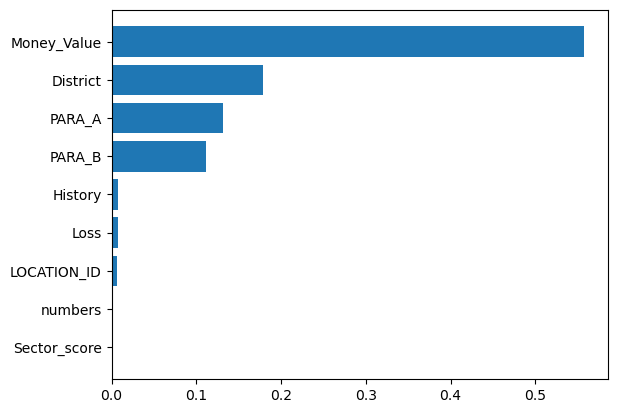

In [84]:
importances = dt.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X.columns)[indices])

We found that `PARA_A` had the highest importance compare to the other feature

### Confusion Matrix

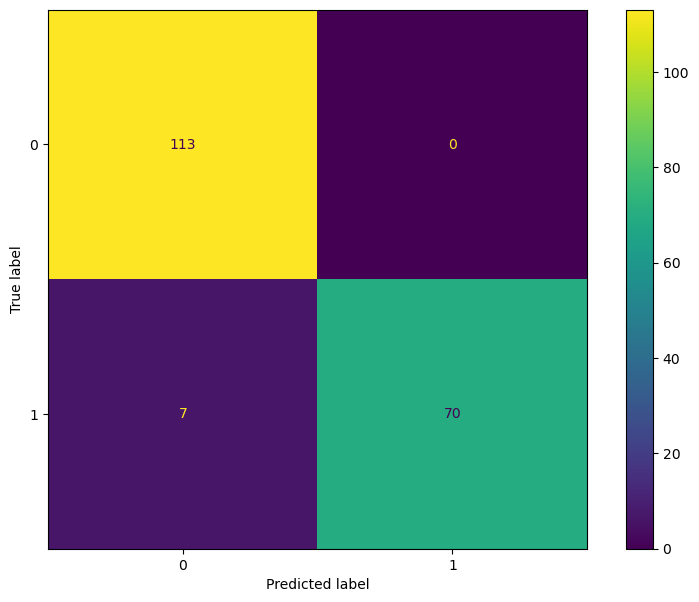

In [85]:
fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

# Conclusion

* Decision Tree model berhasil untuk mempredisi 961 dari 1000 institusi yang melakukan tindakan kecurangan dan tidak melakukan tindakan kecurangan.
* "Money Value, District, PARA_A, PARA_B" merupakan fitur yang paling penting
* Model decision tree merupakan model yang disarankan untuk digunakan dibandingkan 5 model yang diuji karena menghasilkan nilai recall terbesar

# Recommendation
* Institusi dengan ID lokasi 1-11 dan 22-31 disarankan untuk diberikan peringatan dan dilakukan pengawasan ketat karena secara historis menghabiskan dana besar dan melaporkan informasi yang tidak valid
* Menjalankan atau mengaplikasikan model dengan penambahan peringatan otomatis ketika sebuah institusi sudah melewati standar salah pelaporan